In [1]:
import sympy
from sympy import symbols, lambdify
from matplotlib.lines import Line2D  # para leyenda personalizada
import numpy as np
import matplotlib.pyplot as plt

In [16]:
# Variables simbólicas
c, s = symbols('c s')
rc, rs, rd, alpha, delta, beta, a, gamma, eta, mu = symbols(
    'rc rs rd alpha delta beta a gamma eta mu'
)

params = {
  rc: 5.84,
  rs: 13.12,
  rd:  10.92,
  alpha: 10.22,
  delta: 5.4,
  beta: 7.6,
  a: 7.22,
  gamma: 0.74,
  eta: 5.08,
  mu: 0
}

In [17]:
# Funciones simbólicas
F1 = (1/4)*c*(-4*(-1 + c)*(-a + c)*rc - 4*s**2*alpha -
      (beta*(2*rd + 2*s**2*delta - c**2*(2*eta + beta*mu))**2)/rd**2 -
      4*mu*(s**2*gamma + (eta*(2*rd + 2*s**2*delta - c**2*(2*eta + beta*mu))**2)/(4*rd**2)))

F2 = (1/4)*s*(-4*rs*(-1 + s) - 4*c**2*gamma - 2*c**2*alpha*mu +
      (delta*(2*rd + 2*s**2*delta - c**2*(2*eta + beta*mu))**2)/rd**2)

In [18]:
# Sustitución de parámetros
F1_eval = F1.subs(params)
F2_eval = F2.subs(params)

# Lambdify para evaluación numérica
f1 = lambdify((c, s), F1_eval, modules='numpy')
f2 = lambdify((c, s), F2_eval, modules='numpy')

# Malla para graficar
C, S = np.meshgrid(np.linspace(0, 3, 100), np.linspace(0, 3, 100))
U = f1(C, S)
V = f2(C, S)

# Calcular curvas nulas e intersecciones aproximadas
f1_vals = np.abs(U)
f2_vals = np.abs(V)
tolerance = 0.01
mask_eq = (f1_vals < tolerance) & (f2_vals < tolerance)
eq_points = np.column_stack((C[mask_eq], S[mask_eq]))

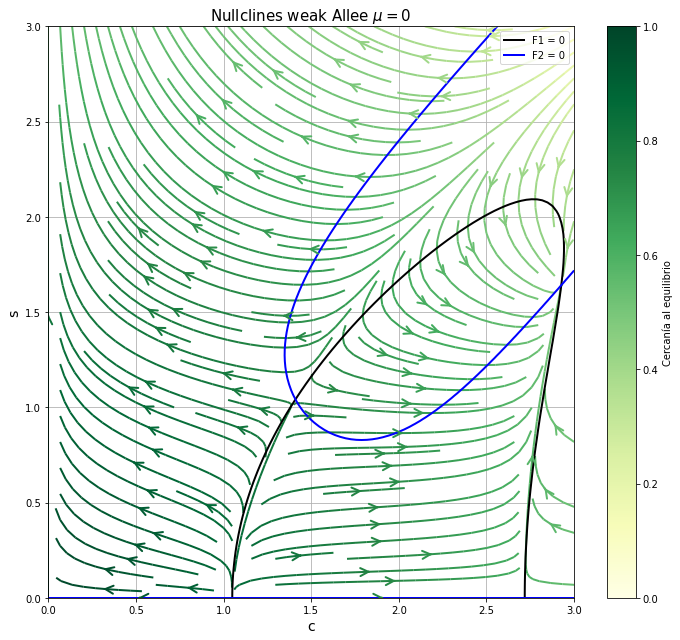

In [19]:
# Calcular color por cercanía a puntos de equilibrio (pero sin mostrarlos)
if eq_points.shape[0] > 0:
    dist = np.min([np.sqrt((C - x)**2 + (S - y)**2) for x, y in eq_points], axis=0)
    color_intensity = 1 - dist / np.max(dist)
    color_intensity = np.sqrt(color_intensity)  # suavizar el contraste
else:
    color_intensity = np.ones_like(C)

# Gráfica
plt.figure(figsize=(10, 9))

# Campo vectorial con color más suave
strm = plt.streamplot(
    C, S, U, V,
    color=color_intensity,
    cmap='YlGn',
    linewidth=2,
    density=1.5,
    arrowstyle='->',
    arrowsize=2
)

# Curvas nulas
contour_f1 = plt.contour(C, S, U, levels=[0], colors='black', linewidths=2)
contour_f2 = plt.contour(C, S, V, levels=[0], colors='blue', linewidths=2)

# Leyenda personalizada usando los colores exactos
legend_elements = [
    Line2D([0], [0], color='black', lw=2, label='F1 = 0'),
    Line2D([0], [0], color='blue', lw=2, label='F2 = 0')
]
plt.legend(handles=legend_elements)

# Configuración final
plt.xlabel('c', fontsize=14)
plt.ylabel('s', fontsize=14)
plt.title('Nullclines weak Allee $\mu = 0$', fontsize=15)
plt.colorbar(strm.lines, label='Cercanía al equilibrio')
plt.grid(True)
plt.xlim(0, 3)
plt.ylim(0, 3)
plt.tight_layout()
plt.show()

In [20]:
def newton_raphson(f1, f2, x0, y0, tol=1e-6, max_iter=100):
    x, y = x0, y0

    for _ in range(max_iter):
        try:
            # Derivadas numéricas (diferencias finitas)
            J11 = (f1(x + tol, y) - f1(x, y)) / tol
            J12 = (f1(x, y + tol) - f1(x, y)) / tol
            J21 = (f2(x + tol, y) - f2(x, y)) / tol
            J22 = (f2(x, y + tol) - f2(x, y)) / tol
            J = np.array([[J11, J12], [J21, J22]])
            F_val = np.array([f1(x, y), f2(x, y)])

            if np.linalg.cond(J) > 1e12:
                return None, None

            delta = np.linalg.solve(J, F_val)

            x -= delta[0]
            y -= delta[1]

            if np.linalg.norm(delta) < tol:
                return x, y
        except:
            return None, None

    return None, None  # no convergió

In [21]:
c0 = 1.4103;
s0 = 1.0414;

In [22]:
# # Suposición inicial
# c0 = 1.03
# s0 = 0.46

# Encontrar las soluciones
c_sol, s_sol = newton_raphson(f1, f2, c0, s0)

In [23]:
c_sol

1.4103646382519963

In [24]:
s_sol

1.041478755661952

In [10]:
# Suposición inicial 2
c1 = 2.7
s1 = 1.5
c_sol, s_sol = newton_raphson(f1, f2, c1, s1)

In [11]:
c_sol

2.9271229985981995

In [12]:
s_sol

1.6416316749026045